#  Appliance Energy Prediction Team10

we collect the data in https://github.com/LuisM78/Appliances-energy-prediction-data. And use the energydata_complete.csv for futher analysis

### Import package and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from datetime import datetime, timedelta
df = pd.read_csv('energydata_complete.csv',  parse_dates=['date'])
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
print(df.shape)

(19735, 29)


The data set contain 19735 rows and 29 columns. For each row, the date feature indicate the specific year,month,day,hour,minute,second. It's very precise but not a good view, so we will add 3 more features based on date and have a better loook

In [3]:
#add new column NSM(number of seconds from midnight)
a = np.empty(19735)
for i in list(range(0, 19735)):
    t = datetime.combine(datetime.min, df.iloc[i]['date'].time()) - datetime.min
    isinstance(t, timedelta)
    a[i] = t.total_seconds()
df = df.assign(NSM=a)
#add new colunms Week Status and Day_Of_Week
weekStatus = np.empty(19735)
dayOfWeek = np.empty(19735)
for i in list(range(0,19735)):
    dayOfWeek[i] = df.iloc[i]['date'].isoweekday()
    if dayOfWeek[i] < 6:
     weekStatus[i] = 1
    else:
     weekStatus[i] = 0
# make Week_Status and Day_of_Week as categorical data
df = df.assign(Week_Status = weekStatus)
df['Week_Status'] = df['Week_Status'].astype('category')
df['Week_Status'].cat.categories = ['Weekend','Weekday']
df = df.assign(Day_of_Week = dayOfWeek)
df['Day_of_Week'] = df['Day_of_Week'].astype('category')
df['Day_of_Week'].cat.categories = ["Mon", "Tue", "Wed", "Thu", "Fri","Sat","Sun"]
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,Week_Status,Day_of_Week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200.0,Weekday,Mon
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800.0,Weekday,Mon
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400.0,Weekday,Mon
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000.0,Weekday,Mon
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600.0,Weekday,Mon


Thus, we add Number of Second from Midnight, Week Status and Day of Week three new columns. These feature will be useful for groupping data and EDA

In [4]:
# Dataset characteristics
print("Number of instances in dataset = {}".format(df.shape[0]))
print("Total number of columns = {}".format(df.columns.shape[0]))
print("Column wise count of null values:-")
print(df.isnull().sum())

Number of instances in dataset = 19735
Total number of columns = 32
Column wise count of null values:-
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
Week_Status    0
Day_of_Week    0
dtype: int64


From above we can see that the dataset has no missing value, so we don't need to handle the missing value any more.

### Exploratory Data Analysis

Text(0, 0.5, 'Appliances Wh')

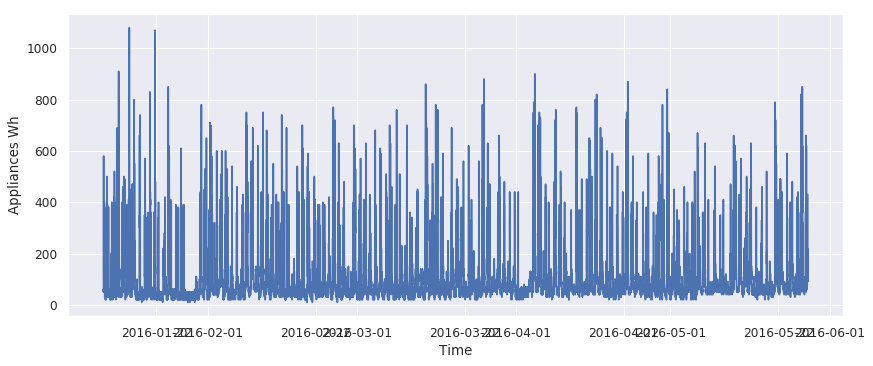

In [5]:
#EDA 
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.plot(df['date'],df['Appliances'])
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
#plt.gcf().autofmt_xdate()

The above figure shows the energy consumption profile for the period. The energy consumption profile shows a high variability. And lets see the detail for the first week

Text(0, 0.5, 'Appliances Wh')

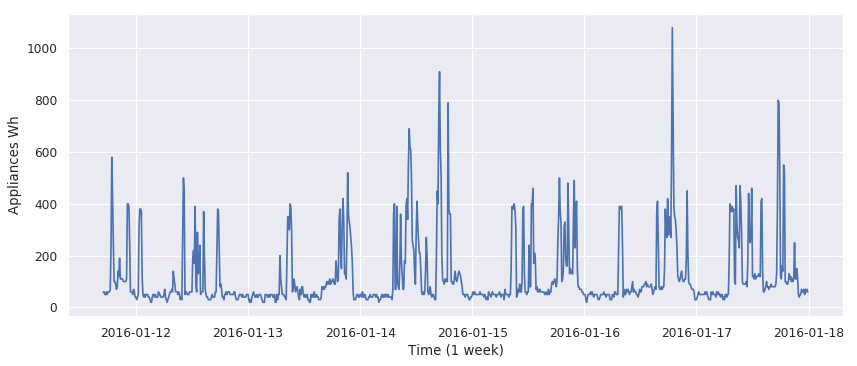

In [6]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.plot(df['date'][0:906],df['Appliances'][0:906])
plt.xlabel('Time (1 week)')
plt.ylabel('Appliances Wh')

For the first week, we can see that for each day the consumption changing from the peak to the trough. The peak may seem different but the trough is basically the same for each day. So we want to know the distribution of the consumption and let's draw a histogram of the Appliances

Text(0, 0.5, 'Frequency')

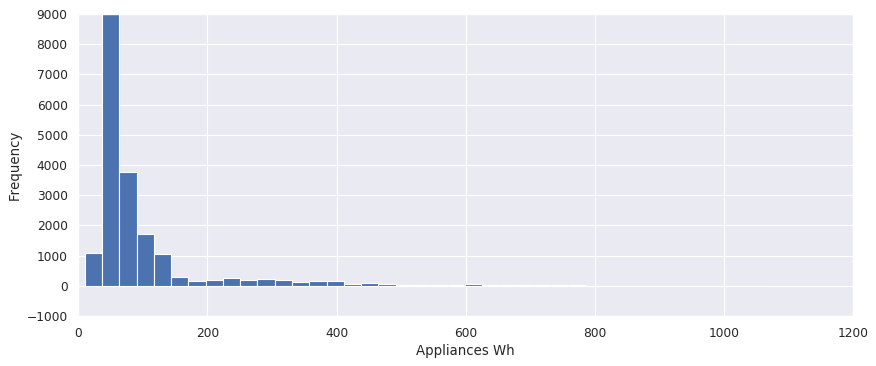

In [7]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.hist(df['Appliances'],bins = 40)
plt.xlim(0, 1200) 
plt.ylim(0, 9000)
plt.yticks(np.arange(-1000,10000,1000))
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')


We can see that most values are in the range of 0-200 Wh and let's see the percentange

In [8]:
print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format(
    (df[df.Appliances <= 200]["Appliances"].count()*100.0) / df.shape[0]
))

Percentage of dataset in range of 0-200 Wh
90.291%


So about 90 percent of the consumption are within 0-200 and let's draw the box plot to see the outlier

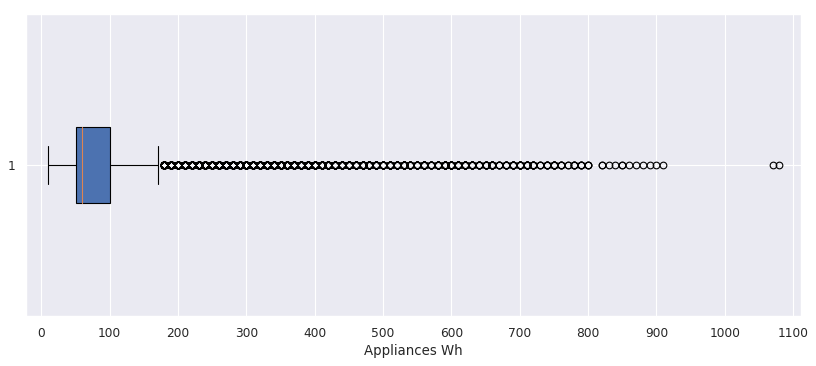

In [9]:
ig=plt.figure(figsize=(12.5,5), dpi= 80, facecolor='w', edgecolor='k')
sns.set()
plt.boxplot(df['Appliances'],vert = False,patch_artist=True,widths = 0.25)
plt.xticks(np.arange(0,1300,100))
plt.xlabel('Appliances Wh')
plt.margins(0.03)

As can be seen the data distribution has a long tail. In the boxplot, the median is represented with a thick black line inside the blue rectangle, and has a value of 60 Wh. The lower whisker has a value of 10 Wh and the upper whisker has a value of 170 Wh. It also shows that the data above the median is more dispersed and that there are several outliers (marked with the round circles above the upper whisker)

To have a better view of the Appliances, we extract the first week data and do more EDA!

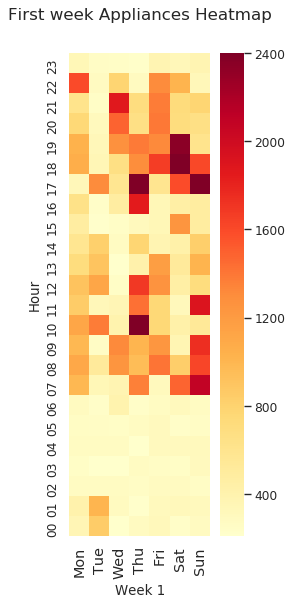

In [10]:
# First Week View 
df_w1 = df.iloc[0:906,[0,1,31]]
df_w1['hour'] = df_w1['date'].dt.strftime("%H")
#df_w1.head(60)
table = pd.pivot_table(df_w1,index=["hour"], values = "Appliances", columns = "Day_of_Week", aggfunc = [np.sum])
#fill the missing value with mean since the first day dosen't start at 00:00:00
m = table.mean(axis = 1)
for i, col in enumerate(table):
    table.iloc[:, i] = table.iloc[:, i].fillna(m)
#table
sns.set()
plt.figure(figsize=(3,8),dpi = 80)
ax = sns.heatmap(table,cmap="YlOrRd",robust=True, square = True)
ax.set(xlabel = 'Week 1',ylabel = 'Hour')
ax.set_title('First week Appliances Heatmap',fontsize = 15,pad = 30)
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(weekday, rotation='vertical', fontsize=13)
ax.invert_yaxis()

The above heatmap shows the first week Appliance's heatmap. We can see that the most consumption are in 7-22 o'clock which make sense. The peak consumption period is about 16 to 19, may be because the people go back home from work during that time and the consumption reach the peak in the day.

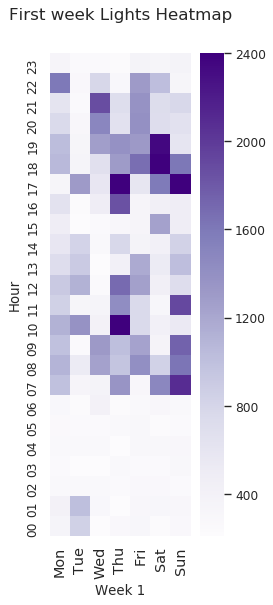

In [11]:
df_w2 = df.iloc[0:906,[0,2,31]]
df_w2['hour'] = df_w2['date'].dt.strftime("%H")
#df_w1.head(60)
table1 = pd.pivot_table(df_w2,index=["hour"], values = "lights", columns = "Day_of_Week", aggfunc = [np.sum])
#fill the missing value with mean 
m1 = table1.mean(axis = 1)
for i, col in enumerate(table1):
    table1.iloc[:, i] = table1.iloc[:, i].fillna(m1)
#table
sns.set()
plt.figure(figsize=(3,8),dpi = 80)
ax = sns.heatmap(table,cmap="Purples",robust=True, square = True)
ax.set(xlabel = 'Week 1',ylabel = 'Hour')
ax.set_title('First week Lights Heatmap',fontsize = 15,pad = 30)
weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax.set_xticklabels(weekday, rotation='vertical', fontsize=13)
ax.invert_yaxis()

We can also see the light consumption which is pretty same with Appliances

Then let's extend the data into first 4 weeks and to see the "daily" view of the Appliances

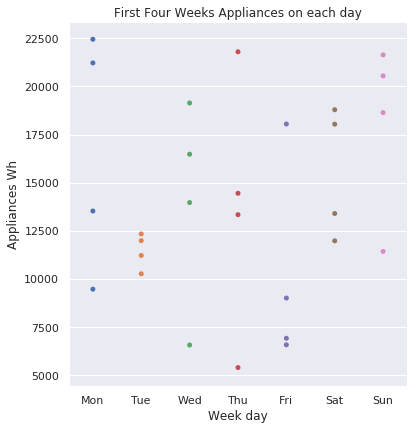

In [12]:
#get the first 4 weeks row
df_a1 = df.iloc[42:4074,[0,1,2,30,31]]
df_a1['Day'] = df_a1['date'].dt.strftime("%d")
#Sum the Appliances by each Day
table3 = pd.pivot_table(df_a1, index = ["Day_of_Week","Day"], values = ["Appliances","lights"],aggfunc = [np.sum]).reset_index()
table3.columns = ['Day_of_Week','Day','Appliances','lights']
#Draw the catplot to see the Appliances on each "Day_of_Week"
ax = sns.catplot(x = 'Day_of_Week', y = 'Appliances', jitter = False, data = table3, height=6, aspect=6/6)
ax.set(xlabel = 'Week day', ylabel = 'Appliances Wh')
ax.set(title = 'First Four Weeks Appliances on each day')

For each Day_of_Week, We can see the daily amount of the Appliances. What we found intresting is unlike other day, Tuesday's consumption stay basically same while others varying significant. 

From the above grah, despite Tuesday the daily behavior seem have nothing to do with "which day of week is that day"
So, let's see the average daily behavior to summarize the daily behavior.

[Text(0.5, 1.0, 'Average of First Four Weeks Appliances on each day')]

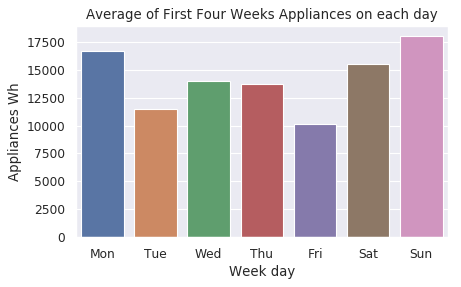

In [13]:
# get the mean of Appliances 
t3 = df_a1.groupby(["Day_of_Week"])['Appliances','lights'].mean().reset_index()
t3['Appliances'] = t3['Appliances'] * 144
plt.figure(figsize=(6,3.5),dpi = 80)
ax = sns.barplot(x = 'Day_of_Week', y = 'Appliances', data = t3)
ax.set(xlabel = 'Week day', ylabel = 'Appliances Wh')
ax.set(title = 'Average of First Four Weeks Appliances on each day')

It can be seen that the top 3 consumption day is Sun, Mon and Sat which make sense because the owner will spend more time in home on the weekend and maybe on Monday the owner don't have to work either.

Combine with the catplot we may conclude that:
1. On each Tuesday the owner maybe have to work overtime or stay in somewhere else
2. Trere are 3 "Friday" data which is pretty low and maybe it is becaues the owner went to have a party on Friday night!

Let's move to see the correlationship of each column. Since there are many columns, we will devide it into 4 part

Text(0.5, 1.0, 'Corrleation 1st Part')

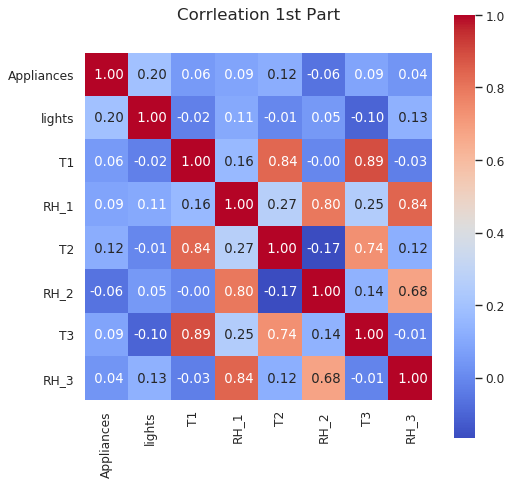

In [14]:
#Corr From lights to RH_3
df_r1 = df.iloc[:, 1:9]
corr = df_r1.corr()
plt.figure(figsize=(7,7),dpi = 80)
ax = sns.heatmap(corr,cmap = "coolwarm",square = True, annot = True, fmt = ' .2f')
ax.set_title('Corrleation 1st Part',fontsize = 15,pad = 30)

From 1st part, we can see that {"T1","T2"} and {"T1","T3"} have a strong positive relationship. T1 reprents kicthen area, T2 reprents living room area and T3 reprents laundry room area. And when see the floor plan we can see that the kicthen are next to both laundry and living room, So it makes sense that T1 have the great positive relationship withT2 and T3


Text(0.5, 1.0, 'Corrleation 2nd Part')

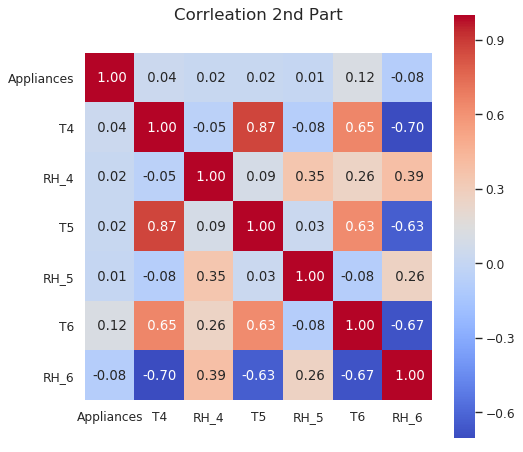

In [15]:
#Corr form T4 to RH_6
df_r2 = df.iloc[:, [1,9,10,11,12,13,14]]
corr = df_r2.corr()
plt.figure(figsize=(7,7),dpi = 80)
ax = sns.heatmap(corr,cmap = "coolwarm",square = True, annot = True, fmt = ' .2f')
ax.set_title('Corrleation 2nd Part',fontsize = 15,pad = 30)

In the 2nd Part, T4 and T5 have a strong positive relationship(0.87) and it is also because of the location 

Text(0.5, 1.0, 'Corrleation 3rd Part')

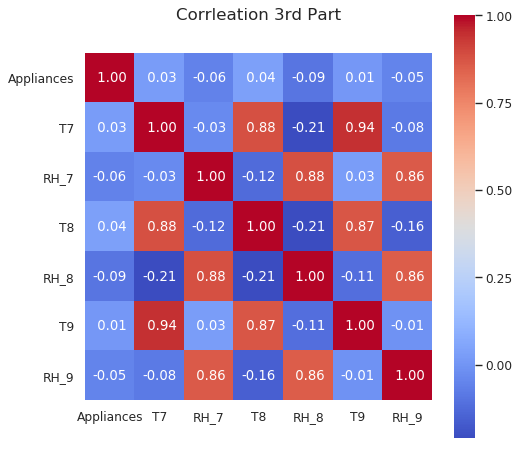

In [16]:
#Corr from T7 to RH_9
df_r3 = df.iloc[:, [1,15,16,17,18,19,20]]
corr = df_r3.corr()
plt.figure(figsize=(7,7),dpi = 80)
ax = sns.heatmap(corr,cmap = "coolwarm",square = True, annot = True, fmt = ' .2f')
ax.set_title('Corrleation 3rd Part',fontsize = 15,pad = 30)

From 3rd Part, we can see that {"T7","T8"} ,{"T7","T9"},{"T8","T9"},{"RH_7","RH_8"} ,{"RH_7","RH_9"} and {"RH_8","RH_9"} have strong positive relationship and 7,8,9 reprents the iron room ,teenager room and parent room. Which from the 2nd floor plan we can see these three room is close to each other.

Text(0.5, 1.0, 'Corrleation 4th Part')

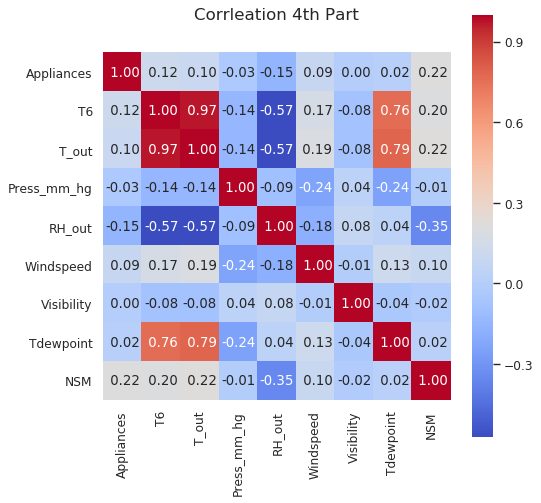

In [17]:
df_r4 = df.iloc[:,[1,13,21,22,23,24,25,26,29]]
corr = df_r4.corr()
plt.figure(figsize=(7,7),dpi = 80)
ax = sns.heatmap(corr,cmap = "coolwarm",square = True, annot = True, fmt = ' .2f')
ax.set_title('Corrleation 4th Part',fontsize = 15,pad = 30)

From part 4 we can see that the T6 and T_out have a very strong relationship we is 0.97. Because T6 is the temperature from the sensor outside the building and T_out is the temperature collected from the weather station so these two features are pretty same.

### Feature Engineering

Now that we finish the EDA part, let's jump into how to prepare the data for the prediction model

First, let's devide the feature columns into different part to analysis it 

In [18]:
#Feature Engineering
# Columns for temperature sensors
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

# Columns for humidity sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

# Columns for weather data
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"]


In [19]:
df[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000


From all the temperature columns we can see:
Temperature ranges for all home sensors is between 14.89℃ to 29.86℃ except for T6 for which it is -6.06℃ to 28.29℃. The reason for such low readings is that the sensor is kept outside.

Let's see the humidity columns

In [20]:
df[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


From humidity feature columns:
Similarly, humudity ranges for all home sensors is between 20.60% to 63.36%. Except for RH_5 and RH_6, whose ranges are 29.82% to 96.32% and 1% to 99.9% respectively.

The reason behind this is that RH_5 is inside the bathroom, And RH_6 is outside the building, explaining the high humidity values.

In [21]:
df[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,7.411665,3.760707,79.750418,755.522602,4.039752,38.330834
std,5.317409,4.194648,14.901088,7.399441,2.451221,11.794719
min,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.000000
25%,3.666667,0.900000,70.333333,750.933333,2.000000,29.000000
50%,6.916667,3.433333,83.666667,756.100000,3.666667,40.000000
75%,10.408333,6.566667,91.666667,760.933333,5.500000,40.000000
max,26.100000,15.500000,100.000000,772.300000,14.000000,66.000000


From weather columns, we can see that:

T_out and Tdewpoint may have outlier because the 75% of the is pretty away from it's max. It may because some extreme weather happened.

Then Let's see the distribution of each features:

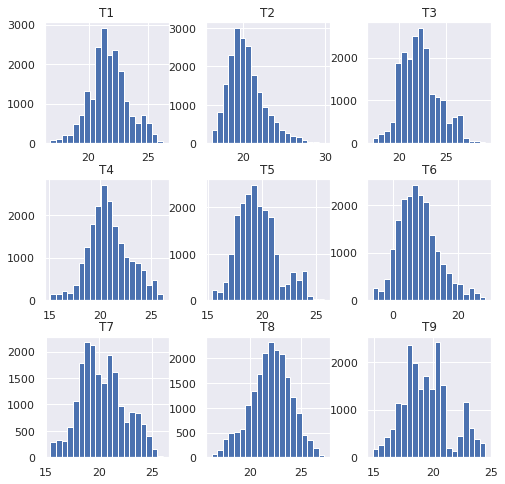

In [22]:
#histogram for each temperature columns
h1 = df[temp_cols].hist(figsize = (8,8),bins = 20)

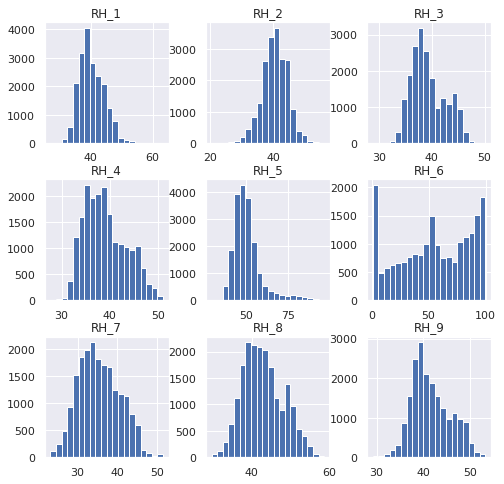

In [23]:
#histogram for each humidity columns
h2 = df[rho_cols].hist(figsize = (8,8),bins = 20)

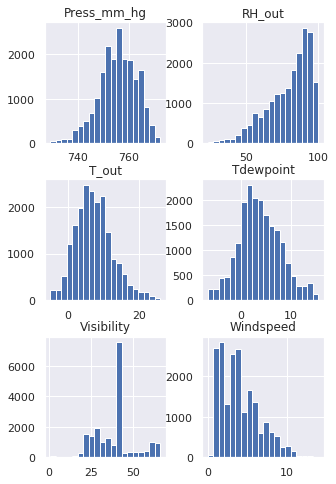

In [24]:
#histogram for weather columns
h3 = df[weather_cols].hist(figsize = (5,8),bins = 20)

From all the above histogram we can conclude that:
1. All temperature feature follow a Normal distribution except for T9.
2. All humidity values except RH_6 and RH_out follow a Normal distribution. That is, all the readings from sensors inside the home are from a Normal distribution.
3. Out of the remaining columns, we can see that Visibility, Windspeed are skewed.

Now we see the summary and distribution of each features and From the EDA step we know that the temperature and humidity features may have some strong inner relationship and we will find them all

In [25]:
# Import pearson relation method from SciPy
from scipy.stats import pearsonr

# Calculate the coefficient and p-value
corr_coef, p_val = pearsonr(df["T7"], df["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.9447764235687443
p-value : 0.0


We use pearsonr to get the correlationship between two variable and the p-value which indicate the probability if the two are uncorrelated. 

From above we can see that the T7 and T9 are very strong correlated

Let's see all possible combination pair of the fearure in the dataset (numeric data)

In [26]:
# To generate all pairs for given columns
from itertools import combinations
df_r = df.iloc[:,3:27]
for pair in combinations(df_r.columns, 2):
    col_1, col_2 = pair
    # Calculate the coefficient and p-value
    corr_coef, p_val = pearsonr(df_r[col_1], df_r[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        # Print details for pairs with high correlation
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : T3, T9
Correlation coefficient : 0.901323585082566
p-value : 0.0
Column pair : T5, T9
Correlation coefficient : 0.9110551178067928
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9747866900664536
p-value : 0.0
Column pair : T7, T9
Correlation coefficient : 0.9447764235687443
p-value : 0.0


What we can see is that  3 columns have a high degree of correlation with T9, all of which have a p-value equal to 0. Therefore, T9 can be considered as redundant.

Also, a very high correlation exists between features T6 and T_out. This shouldn't be surprising as T6 is reading from a temperature sensor kept outside the building and T_out is temperature obtained from Weather station.

Let's plot T6 and T_out to get a detailed visualization.

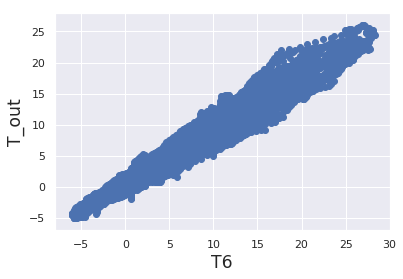

In [27]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(df.T6.min()) - 2, int(df.T6.max()) + 2)
plt.ylim(int(df.T_out.min()) - 2, int(df.T_out.max()) + 2)

plt.scatter(df["T6"], df["T_out"])

It's very obvious that the T6 and T_out are linear correlated and so the T6 is also can be considered as redundant.

### Preparing the data

To prepare the data for the use of prediction we must do the two things:

1. For all the numeric data --- Feature Scaling
2. For all the categorcial data ----Encoding

We will devide the feature based on these two type and deal with it separately.

In [28]:
# Remove correlated features T6 and T9
data =  df.drop(["date","T6", "T9"], axis=1)
# data cleaning - remove random variables rv1 and rv2
data = data.drop('rv1', 1)
data = data.drop('rv2', 1)

# divide data into category and numerical and do preprocessing
numeric_columns = data.select_dtypes(include=['float64','int64']).columns
categorical_columns = data.select_dtypes(include=['category']).columns

# One-hot encoding for category features
cat = pd.get_dummies(data[categorical_columns])

#Normalize the data set for ease of calculations so that all features have values between 0 and 1
df_num = data[numeric_columns]

df_num=(df_num-df_num.min())/(df_num.max()-df_num.min())

data1 = pd.concat([df_num,cat],axis = 1)
data1.head()
#Split into train and test
from sklearn.model_selection import train_test_split
y = data1['Appliances']
X = data1.drop('Appliances',1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

X_train.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,NSM,Week_Status_Weekend,Week_Status_Weekday,Day_of_Week_Mon,Day_of_Week_Tue,Day_of_Week_Wed,Day_of_Week_Thu,Day_of_Week_Fri,Day_of_Week_Sat,Day_of_Week_Sun
11074,0.000000,0.686378,0.331254,0.472498,0.463867,0.570511,0.568157,0.569970,0.496372,0.455805,...,0.615385,0,1,1,0,0,0,0,0,0
332,0.000000,0.254488,0.413815,0.181730,0.585622,0.249252,0.688581,0.329730,0.583298,0.277114,...,0.013986,0,1,0,0,0,1,0,0,0
15297,0.000000,0.531503,0.256032,0.241822,0.487206,0.398804,0.324038,0.453453,0.236449,0.387960,...,0.944056,0,1,0,1,0,0,0,0,0
1179,0.285714,0.307286,0.347858,0.202811,0.542600,0.249252,0.543231,0.470571,0.343150,0.255136,...,0.902098,0,1,0,1,0,0,0,0,0
14557,0.000000,0.666315,0.289056,0.481948,0.416253,0.498504,0.361427,0.701802,0.295775,0.541806,...,0.804196,0,1,0,0,0,1,0,0,0


Now all the data can be used for the prediction model!

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'Week_Status_Weekend', 'Week_Status_Weekday', 'Day_of_Week_Mon', 'Day_of_Week_Tue', 'Day_of_Week_Wed', 'Day_of_Week_Thu', 'Day_of_Week_Fri', 'Day_of_Week_Sat', 'Day_of_Week_Sun']
Optimal number of features : 31


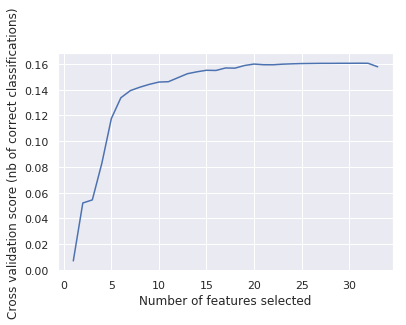

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
import warnings

# Suppress an annoying but harmless warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Create the RFE object and compute a cross-validated score.
lr = LinearRegression()
rfecv = RFECV(estimator=lr, step=1, scoring='r2')

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)

X_train.columns[rfecv.get_support(indices=True)]

# 1st way to get the list
vector_names = list(X_train.columns[rfecv.get_support(indices=True)])
print(vector_names)

print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()




In [30]:
from sklearn.metrics import r2_score
lr.fit(X_train,y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = lr.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
r2_score(y_test, y_pred)

0.17007642483982155

In [31]:
X_test1 = X_test[vector_names]
X_train1 = X_train[vector_names]

lr1 = lr.fit(X_train1,y_train)

y_pred1 = lr1.predict(X_test1)

r2_score(y_test,y_pred1)


0.17043405634324826

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
rf = RandomForestRegressor(max_depth=100, random_state=15, n_estimators=5)

rf.fit(X_train, y_train)
feat_labels = list(X_train)

#print("Features sorted by their score:")
#print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15

for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)
sfm = SelectFromModel(rf, threshold=0.15)


('lights', 0.031338202243407914)
('T1', 0.03376474702223964)
('RH_1', 0.035076119452495516)
('T2', 0.026366631479519308)
('RH_2', 0.038038007008360235)
('T3', 0.05638196426652929)
('RH_3', 0.04968689874153001)
('T4', 0.034807979539051424)
('RH_4', 0.025592763189211904)
('T5', 0.030595152563192562)
('RH_5', 0.049796280098259746)
('RH_6', 0.04146241301672959)
('T7', 0.028083269086461117)
('RH_7', 0.030794049569910425)
('T8', 0.04440532569718515)
('RH_8', 0.032462749432794986)
('RH_9', 0.03222544363562221)
('T_out', 0.04422341134588841)
('Press_mm_hg', 0.041319935271476996)
('RH_out', 0.029626171321247396)
('Windspeed', 0.02696739921935784)
('Visibility', 0.025007600534201542)
('Tdewpoint', 0.03045222237124242)
('NSM', 0.1654157643385191)
('Week_Status_Weekend', 0.00014576505874530822)
('Week_Status_Weekday', 0.0006193925567254514)
('Day_of_Week_Mon', 0.003334887401484432)
('Day_of_Week_Tue', 0.0014328581406741394)
('Day_of_Week_Wed', 0.0011875110811752272)
('Day_of_Week_Thu', 0.001684980

In [33]:
sfm = SelectFromModel(rf, threshold=0.15)
# Train the selector
sfm.fit(X_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

NSM


In [34]:
#Regression Test

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

def printMetrics(algorithm):
    print("RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, algorithm)))
    print("MAPE: %.2f"
          % mean_absolute_percentage_error(y_test, algorithm)+'%')
    print("R2: %.2f"
          % r2_score(y_test, algorithm))
    print("MAE: %.2f"
          % mean_absolute_error(y_test, algorithm))

In [35]:
#Linear
print('Linear Regression:')

linear = LinearRegression()
linear.fit(X_train,y_train)
linearPredict = linear.predict(X_test)

printMetrics(linearPredict)

Linear Regression:
RMSE: 0.09
MAPE: 77.96%
R2: 0.17
MAE: 0.05


In [36]:
#SVM
print('SVM RBF Regression')

#for i in range(100,500,100):
#    linear = SVR(kernel='linear', C=i)
#    linear.fit(X_train, y_train)
#    print("i=%f score=%f" %(i,linear.score(X_test, y_test)))

svm = SVR(kernel='rbf',C = 10,gamma = 'scale')
svm.fit(X_train,y_train)
svmPredict = svm.predict(X_test)

printMetrics(svmPredict)

SVM RBF Regression
RMSE: 0.09
MAPE: 141.05%
R2: 0.11
MAE: 0.07


In [37]:
#Random Forest
print('Random Forest Regression:')

#for j in range(50,100,15):
#    print("j=%f"%j)
#    for i in range(50,100,15):
#        randomForest = RandomForestRegressor(max_depth=i, n_estimators = j, random_state = 2)
#        randomForest.fit(X_train, y_train)
#        print("i=%f score=%f" %(i,randomForest.score(X_test, y_test)))
    
randomForest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
randomForest.fit(X_train,y_train)
randomForestPredict = randomForest.predict(X_test)
printMetrics(randomForestPredict)

Random Forest Regression:
RMSE: 0.07
MAPE: 40.69%
R2: 0.49
MAE: 0.03


In [38]:
#Neural Network
print('Neural Network Regression:')

#for i in range(100,1000,100):
#    neuralNetwork = MLPRegressor(hidden_layer_sizes=(i,),max_iter = 1000)
#    neuralNetwork.fit(X_train, y_train)
#    print("i=%f score=%f" %(i,neuralNetwork.score(X_test, y_test)))

neuralNetwork = MLPRegressor(hidden_layer_sizes=(40,))
neuralNetwork.fit(X_train,y_train)
neuralNetworkPredict = neuralNetwork.predict(X_test)

printMetrics(neuralNetworkPredict)

Neural Network Regression:
RMSE: 0.09
MAPE: 81.78%
R2: 0.16
MAE: 0.05


In [39]:
#GBM
print('GBM Regression:')

gbm = ensemble.GradientBoostingRegressor(n_estimators = 100)
gbm.fit(X_train,y_train)
gbmPredict = gbm.predict(X_test)

printMetrics(gbmPredict)

GBM Regression:
RMSE: 0.08
MAPE: 62.23%
R2: 0.30
MAE: 0.04


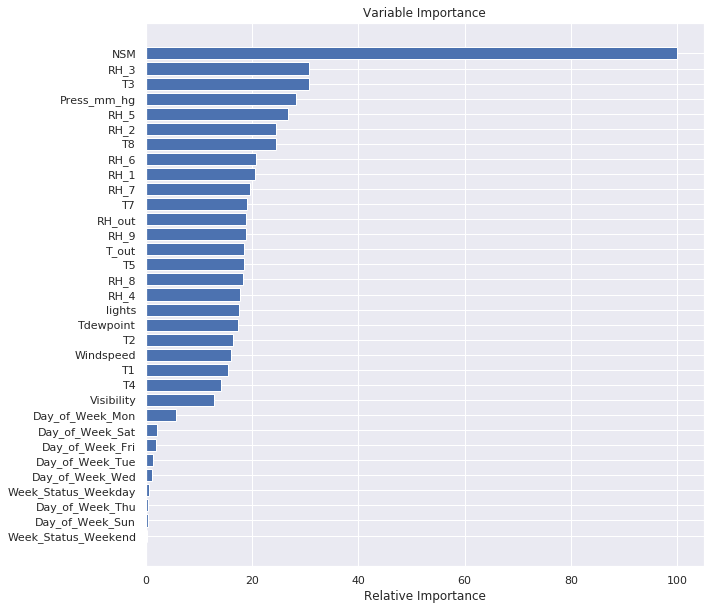

In [40]:
feature_importance = randomForest.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_index = []
for i in sorted_idx:
    sorted_index.append(X_train.columns[i])
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplots(figsize=(10,10))
plt.plot()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, sorted_index)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

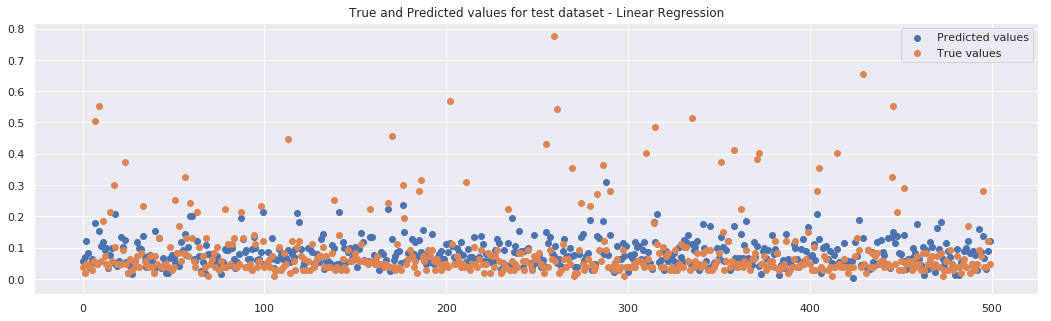

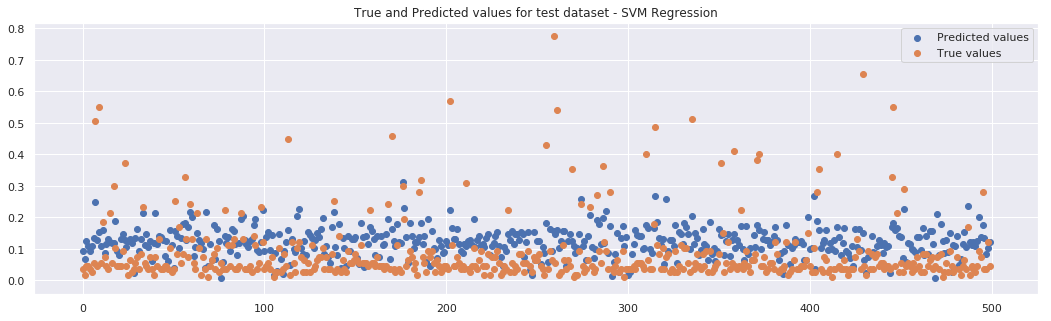

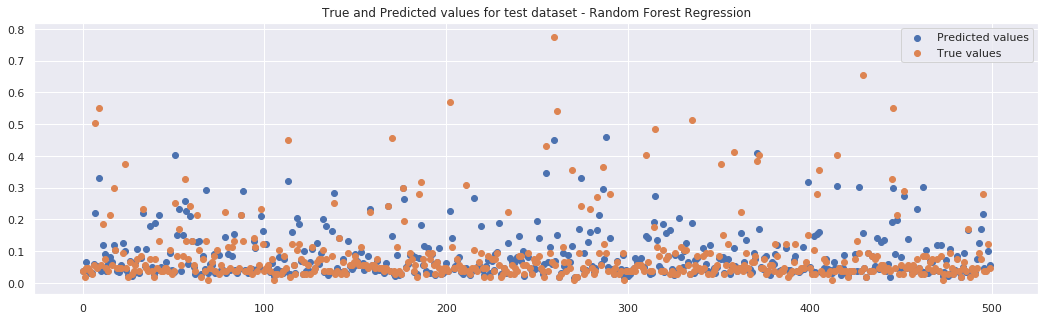

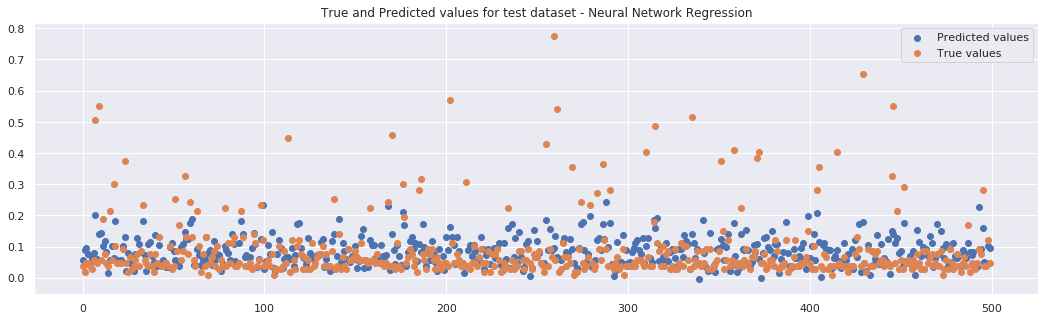

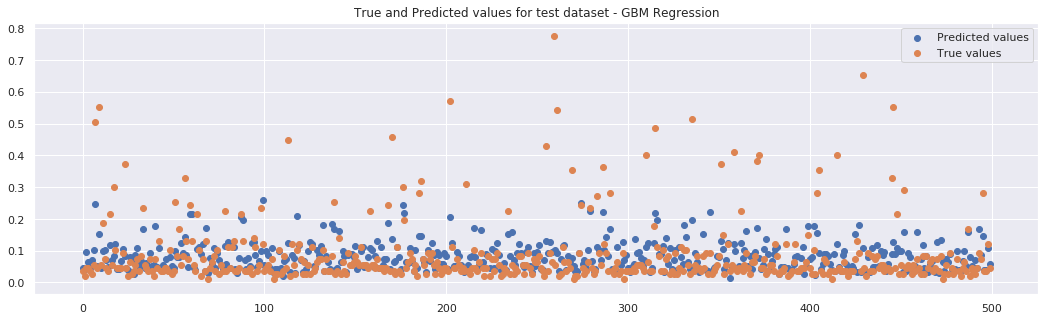

In [41]:
#Overview
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def view_prediction(y_test, predictions, algorithm, samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
    fig = plt.figure(figsize=(18,5))
    plt.scatter(x=[i for i in range(samples)], y=[predictions[0:samples]], label='Predicted values')
    plt.scatter(x=[i for i in range(samples)], y=[y_test.values[0:samples]], label='True values')
    plt.title('True and Predicted values for test dataset - %s' % algorithm)
    plt.legend()
    plt.show()
def view_all_predictions():
    view_prediction(y_test, linearPredict,'Linear Regression', samples = 500)
    view_prediction(y_test, svmPredict,'SVM Regression', samples = 500)
    view_prediction(y_test, randomForestPredict,'Random Forest Regression', samples = 500)
    view_prediction(y_test, neuralNetworkPredict,'Neural Network Regression', samples = 500)
    view_prediction(y_test, gbmPredict,'GBM Regression', samples = 500)
view_all_predictions();

In [42]:
#Cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, X, y, cv=2))

print(cross_val_score(randomForest, X, y, cv=3))

print(cross_val_score(neuralNetwork, X, y, cv=3))

print(cross_val_score(linear, X, y, cv=3))

print(cross_val_score(gbm, X, y, cv=3))

[-0.24092328 -1.42657162]
[-1.569383   -0.1493251  -2.62891456]
[-0.25148634  0.06931611 -0.05147903]
[-0.23767027  0.09873918  0.02725498]
[-2.56479901  0.16033235 -2.62658791]


In [ ]:

#Bias-varience Trade-off
for i in range(100,500,100):
    linear = SVR(kernel='linear', C=i)
    linear.fit(X_train, y_train)
    print("i=%f score=%f" %(i,linear.score(X_test, y_test)))
    print("i=%f validation=%f" %(i,np.mean(cross_val_score(svm, X, y, cv=2))))
    
for j in range(50,100,15):
    print("j=%f"%j)
    for i in range(50,100,15):
        randomForest = RandomForestRegressor(max_depth=i, n_estimators = j, random_state = 2)
        randomForest.fit(X_train, y_train)
        print("i=%f score=%f" %(i,randomForest.score(X_test, y_test)))
        print("i=%f validation=%f" %(i,np.mean(cross_val_score(randomForest, X, y, cv=2))))
        
for i in range(100,1000,100):
    neuralNetwork = MLPRegressor(hidden_layer_sizes=(i,),max_iter = 1000)
    neuralNetwork.fit(X_train, y_train)
    print("i=%f score=%f" %(i,neuralNetwork.score(X_test, y_test)))
    print("i=%f validation=%f" %(i,np.mean(cross_val_score(neuralNetwork, X, y, cv=2))))

In [43]:
#Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline

# ANOVA Regressor
rgr = randomForest
anova_forest = Pipeline([('regression', rgr)])
# You can set the parameters using the names issued
# For instance, fit using a k of 10 in the SelectKBest
# and a parameter 'C' of the svm

prediction = anova_forest.predict(X)
anova_forest.score(X, y)

# getting the selected features chosen by anova_filter

0.8241125641536787